# Projet Python 2A : Performance énergétique des logements en France et caractéristiques socioéconomiques

Ce projet a pour but d’analyser la performance énergétique des logements en France métropolitaine (hors Corse) a une échelle départementale d’un point de vue socioéconomique. Il mettra en regard les caractéristiques des logements, les caractéristiques géographiques des départements étudiés mais également les caractéristiques socioéconomiques des habitants pour comprendre dans quelle mesure elles sont liées entre elles. Il sera réalisé à l’aide des données Insee et de données de l’Ademe et du ministère de la Transition Ecologique (a compléter modifier ex : ign si on a besoin de données géo, edf conso électrique etc. ).
# a reprendre

# Introduction

In [1]:
# idée afficher une image / mème de Bruno Le Maire et de son col roulé 

L'augmentation des prix de l'énergie en 2022 ainsi que les risques de pénuruie notamment dus à la guerre en Ukraine, on conduit le ministre de l'Economie en France à suggérer aux français de baisser leur chauffage et de porter des cols roulés. 

Cela nous a donc amené à questionner la consommation énergétique des français, et en particulier, celle de leur logement. 
A partir des données de diagnostique de performance énergétique (DPE) des logements en France métropolitaine (hors Corse) issues de l'Agence de la transition écologique (Ademe), retraitées et augmentées par le ministère de la Transition Ecologique à partir de données sociofiscale produite par l'Institut National des Statistiques et des Etudes Economique (Insee, données filosofi) il est possible d'étudier le lien entre performance énergétique des logements et caractéristiques socioéconomiques du territoires et des habitants. En effet, le DPE, instauré en 2006 et obligatoire lors de la vente ou de la location d'un logement, est un indicateur de la performance énergétique et climatique à destination de l'ensemble des français mais également un outil des politiques publiques environementales. Il permet par exemple de repérer les passoires thermiques. 

L’analyse de la performance énergétique des bâtiments permet de contribuer à répondre à une demande citoyenne et politique. Dans le cadre de la transition écologique, elle représente un indicateur des politiques de rénovations à mener, et compte tenue de la mise jours des données, d’un suivi de cette même politique. En poursuivant l’étude sous un angle socioéconomique, le projet donne également à voir les différences territoriales, sociale et économique en termes de performance énergétique des logements et permet donc en partie d’évaluer sous le prisme des inégalités et de la redistribution les politiques récentes menées par le gouvernement : prime à la rénovation sous condition de revenu, obtention d’une note minimale au DPE pour mettre en location son logement etc. Ainsi, précrarité erngétique et précarité monétaire sont elles dépendantes ? 

L'étude est réalisée à l'échelle départementale. Plusieurs variables semblent pertinentes pour répondre à cette problématique

- Les caractéristiques du logement : type de logement, surface, date de construction, 
- Les cractéristiques des habitants : parc locatif (peut être a mettre en interaction avec le type de logement), statut d’occupation, revenus par quartile 
- La situation géographique : voir si l’on complète avec des données autres (ign/insee) : part de rural, zone d’emploi, températures, altitudes ; on peut aussi éventuellement essayer de faire parler des cartes en récupérant des données socioéconomiques à un niveau départemental qui nous manquerait (taux de chômage, taux de famille monoparentale, proportion de personne âgés, proportion d’enfants, proportions d’étudiants – qui peuvent être des publics cibles)


# 1. Descriptions des sources de données et de leurs récupérations 

## 1.1. Instalation des packages nécessaires

# Attention, a mettre à jour à chaque fois 

In [149]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas

In [150]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [151]:
!pip install --upgrade botocore==1.23.26  #Sur colab, sinon bug
!pip install --upgrade urllib3==1.22.0 #Sur colab, sinon bug
!pip install py7zr #Sur colab, sinon bug
!pip install s3fs #Sur colab, sinon bug
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .

  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.13
    Uninstalling urllib3-1.26.13:
      Successfully uninstalled urllib3-1.26.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.23.26 requires urllib3<1.27,>=1.25.4, but you have urllib3 1.22 which is incompatible.
boto3 1.26.13 requires botocore<1.30.0,>=1.29.13, but you have botocore 1.23.26 which is incompatible.
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.22
    Uninstalling urllib3-1.22:
      Successfully uninstalled urllib3-1.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.26.13 r

In [152]:
#!pip install pathlib2
#!pip install python-Levenshtein
#!pip install --upgrade xlrd
#!pip install git+https://github.com/InseeFrLab/Py-Insee-Data.git
!pip install requests
!pip install openpyxl 
!pip install xlrd==1.2.0

On importe ensuite les modules :

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pynsee
#import pynsee.download
import requests
import cartiflette.s3

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/mamba/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_145/2562167287.py", line 7, in <module>
    import cartiflette.s3
  File "/home/onyxia/work/python2A/cartogether/cartogether/cartiflette/__init__.py", line 3, in <module>
    from .s3 import *
  File "/home/onyxia/work/python2A/cartogether/cartogether/cartiflette/s3/__init__.py", line 1, in <module>
    from .s3 import download_vectorfile_s3_all, \
  File "/home/onyxia/work/python2A/cartogether/cartogether/cartiflette/s3/s3.py", line 26, in <module>
    fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": ENDPOINT_URL})
  File "/opt/mamba/lib/python3.10/site-packages/fsspec/spec.py", line 76, in __call__
    obj = super().__call__(*args, **kwargs)
  File "/opt/mamba/lib/python3.10/site-packages/s3fs/core.py", line 187, in __init__
    self.s3 = self.connect()
  File "/op

## 1.2. Autour des données 

### 1.2.1. Importation des données

#### Niveau national 

On commence par importer les données relatives au DPE issues du site du Service des Données et Etudes Statistiques (SDES) du ministère de la Transistion Ecologique. Nous allons travailler pour commencer sur les données nationale, en particulier sur l'onglet "Données locales - départements". 
L'affichage de la base de donnée permet de vérifier que ce dernier c'est bien passé. Cela donne aussi un premier apperçu du nettoyage qui ser ensuite nécessaire. 

In [75]:
url = 'https://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2020-10/parc_logements_dpe_2018.xlsx'
s = requests.get(url).content

xl = pd.ExcelFile(s)  # io.BytesIO(s) is also work
xl.sheet_names        # see all sheet names

df_bdd_nat = xl.parse('Données locales - départements', nrows = 94, header = 0) 

In [76]:
df_bdd_nat.sample(5)

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G
60,62,6460.900605,25392.222174,101854.946877,221840.831335,182560.074629,70322.134407,30176.814494,0.010117,0.039762,0.159495,0.347382,0.285872,0.110118,0.047254
28,30,11893.550815,22149.875563,101984.292581,128520.140811,56154.244573,20665.516122,3815.646394,0.034456,0.064168,0.295450,0.372324,0.162680,0.059868,0.011054
73,75,3251.127540,17469.310878,124227.957673,348091.167414,241460.213994,198800.346428,128932.816738,0.003061,0.016446,0.116950,0.327698,0.227314,0.187153,0.121379
81,83,15975.890127,38501.361145,144417.898930,183315.699969,90573.392847,31887.332866,5291.359924,0.031328,0.075498,0.283193,0.359469,0.177608,0.062529,0.010376
24,26,7954.193964,9680.079748,42271.787383,71289.895313,51705.997481,21466.234095,16035.968005,0.036089,0.043920,0.191792,0.323451,0.234596,0.097395,0.072757


On recommence la procédure pour récupérer les informations relatives aux occupants et les logements au niveau national

In [77]:
df_log_nat = xl.parse('Logements', nrows = 52, header = 0)  
df_hab_nat = xl.parse('Occupants', nrows = 30, header = 0) 
df_hab_nat_enrjvore = xl.parse('Occupants - graphiques', nrows = 4, header = 7) 

In [70]:
df_log_nat.sample(5)

,Type de logement,A,B,C,D,E,F,G,Total général
33,Nombre,15733.986676,131650.622204,1106421.88761,2845533.619134,2148175.850652,933764.717996,326901.925521,7508182.609793
22,Ensemble,519791.054506,1370423.302549,5161097.529871,9791444.899188,6992731.093275,3076042.212202,1708817.908409,28620348
47,De 2012 à 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,avant 1919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nombre,220866.148373,756984.869021,2576265.264322,4719173.51348,2836949.710115,1197256.277384,717023.277109,13024519.059803


In [72]:
df_hab_nat.sample(5)

,Revenus / Statut d'occupation,A,B,C,D,E,F,G,Total général
6,Taux,0.023655,0.034447,0.135022,0.309958,0.270635,0.135816,0.090468,1.000000e+00
5,Nombre,48767.806442,71017.484176,278368.173350,639025.215034,557955.220966,280004.770408,186514.307936,2.061653e+06
13,Maison individuelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.017127,0.041633,0.139480,0.316230,0.257403,0.133252,0.094875,1.000000e+00
17,NaN,0.023306,0.080524,0.261754,0.387255,0.176794,0.054712,0.015655,1.000000e+00


In [78]:
df_hab_nat_enrjvore

,Unnamed: 0,Locataire (parc privé),Locataire (parc social),Propriétaires,Ensemble
0,1er quintile,0.278,0.070,0.233,0.193
1,2nd quintile,0.217,0.069,0.206,0.176
2,3e quintile,0.197,0.067,0.177,0.165
3,4e quintile,0.198,0.070,0.154,0.156


#### Niveau local 

On travaille également à un niveau local, départemental. 
Les données que l'on peut télécharger sur le site du SDES doivent être concaténées pour être exploitées.

In [172]:
from pandas.util.version import parse
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd

resp = urlopen("https://www.statistiques.developpement-durable.gouv.fr/sites/default/files/2021-02/parc_par_departement_dpe_2018.zip") #on récupère le fichier zip par un lien
zipfile = ZipFile(BytesIO(resp.read()))
nom=ZipFile.namelist(zipfile) #on trouve la liste de noms de fichiers (excel et txt) dont on se servira plus tard

for i in range(95):
  def extracted_file(i): #on crée une variable qui permet d'extraire un excel parmi la namelist
    return zipfile.open(nom[i]) #ouvre le département i, il faut aller de 1 jusqu'à 95 (nombre de départements étudiés, le fichier en position 0 étant un texte d'information)

for i in range(95):
  def choix1(i):
    return pd.ExcelFile(extracted_file(i))

for i in range(95):
  def choix2(i):
    return choix1(i).parse('Revenus',skiprows=7 , nrows = 3, header = 0)

S = choix2(1)  #le premier élément
for i in range(2, 95):  
 S = pd.concat([S,choix2(i)])

S

,DEP,REVENUS,DPE A,DPE B,DPE C,DPE D,DPE E,DPE F,DPE G
0,1,D1 à D3,0.012017,0.050021,0.209944,0.304657,0.223262,0.108165,0.091933
1,1,D4 à D7,0.015256,0.059176,0.184939,0.301004,0.246305,0.111131,0.082188
2,1,D8 à D10,0.017854,0.058895,0.196102,0.316818,0.250504,0.098266,0.061560
0,2,D1 à D3,0.005713,0.025285,0.074525,0.249670,0.330824,0.189804,0.124179
1,2,D4 à D7,0.007339,0.028097,0.079050,0.271910,0.326661,0.184070,0.102874
...,...,...,...,...,...,...,...,...,...
1,94,D4 à D7,0.008177,0.042035,0.148175,0.422388,0.244891,0.086463,0.047871
2,94,D8 à D10,0.006376,0.031883,0.141822,0.427113,0.259833,0.091540,0.041433
0,95,D1 à D3,0.007058,0.043746,0.149566,0.373794,0.271765,0.094701,0.059369
1,95,D4 à D7,0.010143,0.048694,0.131316,0.360361,0.291348,0.104057,0.054081


In [ ]:
# On crée un indice d'inégalités entre riches et paurves dans un département à partir du taux de passoires thermiques
liste=[]

for i in range(0,281,3):
  def rapport(i):
    A=S.iloc[i]['DPE G']
    B=S.iloc[i+2]['DPE G']
    C=A/B
    return(C)
for j in range(0,281,3):
  liste.append(rapport(j))
liste

indice_inégalite_dpe = pd.DataFrame (liste)
print(indice_inégalite_dpe)

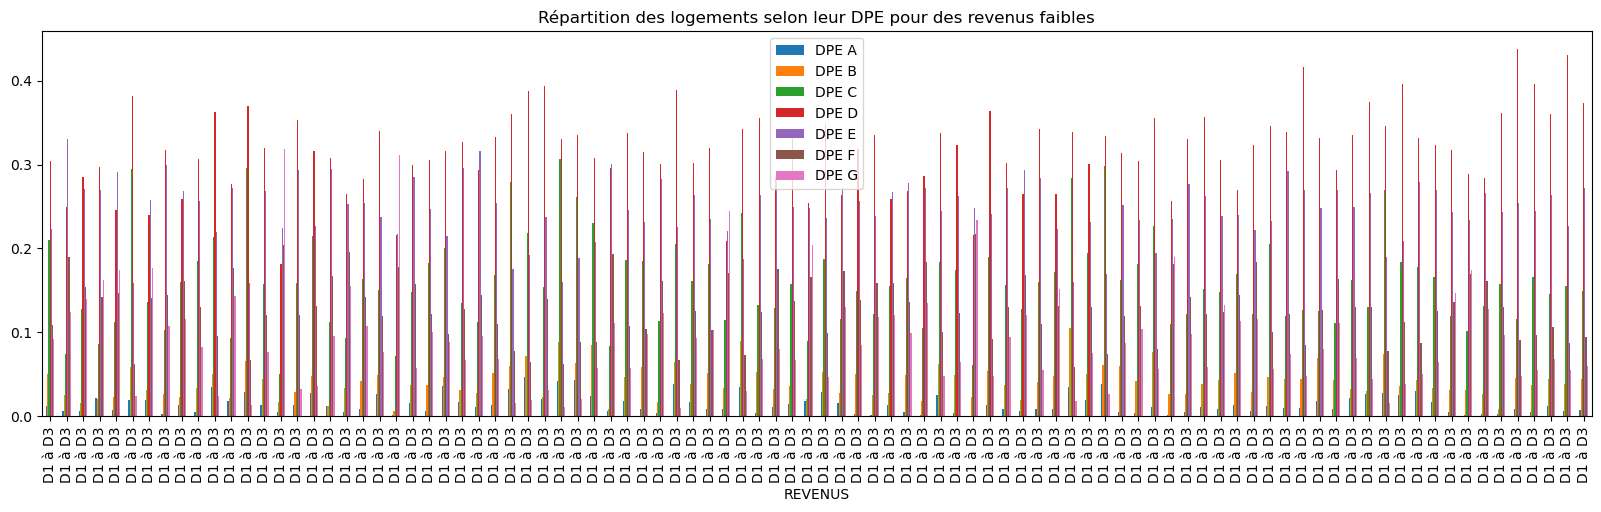

In [173]:
df_plot_S = pd.DataFrame(S[(S['REVENUS'] == 'D1 à D3')],columns=['REVENUS','DPE A','DPE B','DPE C','DPE D','DPE E','DPE F','DPE G'])
df_plot_S.plot(x ='REVENUS', y=['DPE A','DPE B','DPE C','DPE D','DPE E','DPE F','DPE G'],kind = 'bar', figsize=(20,5), title="Répartition des logements selon leur DPE pour des revenus faibles")
plt.show()

#revenus au niveau national , pour les pires départements et les meilleurs


In [174]:
for i in range(95):
  def extracted_file(i): #on crée une variable qui permet d'extraire un excel parmi la namelist
    return zipfile.open(nom[i]) #ouvre le département i, il faut aller de 1 jusqu'à 95 (nombre de départements étudiés, le fichier en position 0 étant un texte d'information)

for i in range(95):
  def choix3(i):
    return pd.ExcelFile(extracted_file(i))

for i in range(95):
  def choix4(i):
    return choix3(i).parse('Année de construction', nrows = 8,skiprows=11 , header = 0)

année_de_construction = choix4(1)  #le premier élément
for i in range(2, 95):  
 année_de_construction = pd.concat([année_de_construction,choix4(i)])

année_de_construction

,DEP,ANNEE_CONST,DPE A,DPE B,DPE C,DPE D,DPE E,DPE F,DPE G
0,1,avant 1919,0.000818,0.000480,0.035370,0.163560,0.243385,0.234882,0.321505
1,1,De 1919 à 1947,0.000495,0.000374,0.030896,0.158021,0.253991,0.240408,0.315815
2,1,De 1948 à 1974,0.001300,0.005692,0.150522,0.356906,0.297186,0.138243,0.050150
3,1,De 1975 à 1988,0.000522,0.005776,0.126351,0.349894,0.359347,0.130309,0.027800
4,1,De 1989 à 2000,0.001224,0.013368,0.286293,0.402889,0.249721,0.041746,0.004758
...,...,...,...,...,...,...,...,...,...
3,95,De 1975 à 1988,0.000106,0.008260,0.107965,0.411615,0.331640,0.111966,0.028447
4,95,De 1989 à 2000,0.000287,0.015305,0.201160,0.429246,0.288366,0.056253,0.009382
5,95,De 2001 à 2005,0.000709,0.036257,0.283228,0.450305,0.198305,0.027156,0.004040
6,95,De 2006 à 2011,0.001079,0.056627,0.283575,0.453801,0.180565,0.018853,0.005501


On va également travailler sur le nombre de logements selon leur date de construction.

In [175]:
for i in range(95):
  def extracted_file(i): #on crée une variable qui permet d'extraire un excel parmi la namelist
    return zipfile.open(nom[i]) #ouvre le département i, il faut aller de 1 jusqu'à 95 (nombre de départements étudiés, le fichier en position 0 étant un texte d'information)

for i in range(95):
  def choix5(i):
    return pd.ExcelFile(extracted_file(i))

for i in range(95):
  def choix6(i):
    return choix5(i).parse('Année de construction', nrows = 8, header = 0)

annee_de_construction_nb = choix6(1)  #le premier élément
for i in range(2, 95):  
 annee_de_construction_nb = pd.concat([annee_de_construction_nb,choix6(i)])

annee_de_construction_nb

,DEP,ANNEE_CONST,DPE A,DPE B,DPE C,DPE D,DPE E,DPE F,DPE G
0,1,avant 1919,29.359002,17.238285,1269.928218,5872.479047,8738.523998,8433.216347,11543.343745
1,1,De 1919 à 1947,6.568578,4.954242,409.741094,2095.647726,3368.383594,3188.242583,4188.288746
2,1,De 1948 à 1974,59.754026,261.591951,6917.188061,16401.533409,13657.096004,6352.902833,2304.648654
3,1,De 1975 à 1988,26.551747,294.081861,6432.557680,17813.150273,18294.399255,6634.032157,1415.311297
4,1,De 1989 à 2000,44.978082,491.039021,10516.295141,14799.158589,9172.928579,1533.454310,174.786857
...,...,...,...,...,...,...,...,...,...
3,95,De 1975 à 1988,10.117064,784.910902,10259.403372,39113.691284,31514.112006,10639.568564,2703.133437
4,95,De 1989 à 2000,19.334488,1031.581359,13558.353499,28931.550184,19436.101966,3791.522971,632.348816
5,95,De 2001 à 2005,15.501864,793.013035,6194.761335,9849.058682,4337.323842,593.952190,88.373037
6,95,De 2006 à 2011,31.092088,1632.060908,8172.965224,13079.096815,5204.109050,543.356089,158.542936


Nous avons choisi de completer les données disponibles au niveau départemental par des indicateurs utilisés souvent par l'Insee et qui premettent de saisir les enjeux sociodémographiques des territoires à l'échelle départementale. Ils sont issus de la base de données Filosofi. Comme aucune information n'était disponible pour 2018, nous avons pris 2019 afin de ne pas créer de gros décalage avec la situtation socioéconomique de 2018 (dernière année donnée pour les DPE).

In [92]:
# URL de la page à télécharger : https://www.insee.fr/fr/statistiques/6036902
# la version 2018 n'est pas accessible, pour coller au plus près on récupère celle de 2019
URL_FILO_ZIP_2019="https://www.insee.fr/fr/statistiques/fichier/6036902/base-cc-filosofi-2019_CSV.zip"
nom = URL_FILO_ZIP_2019.split('/')[-1]
response=requests.get(URL_FILO_ZIP_2019)
if response.status_code == 200:
        with open(nom, 'wb') as f:
            f.write(response.content)
with ZipFile(nom, 'r') as zipfile :
    nom_fichier_data = "cc_filosofi_2019_DEP.csv"
    nom_fichier_meta = "meta_"+nom_fichier_data
    data = zipfile.open(nom_fichier_data)
    meta = zipfile.open(nom_fichier_meta)
donnees_filo_ind_departement_2019=pd.read_csv(data, sep=";", low_memory=False) 
table_var_filo_ind_dep_2019 = pd.read_csv(meta, sep=";", low_memory=False)   

In [93]:
donnees_filo_ind_departement_2019
#donnees_filo_ind_departement_2019.head(30)

,CODGEO,NBMENFISC19,NBPERSMENFISC19,MED19,PIMP19,TP6019,TP60AGE119,TP60AGE219,TP60AGE319,TP60AGE419,...,PPEN19,PPAT19,PPSOC19,PPFAM19,PPMINI19,PPLOGT19,PIMPOT19,D119,D919,RD19
0,01,264074,629120,23490,"59,6","10,7","15,4","12,4","12,0","10,1",...,"24,9","9,1","4,2","1,9","1,5","0,8","-16,2",12890,44620,"3,5"
1,02,223635,513278,19880,"49,5","18,4","30,0","23,4","21,4","17,8",...,"30,9","8,1","8,3","2,8","3,7","1,8","-14,5",10840,33100,"3,1"
2,03,158967,326379,20570,"49,0","15,4","24,9","19,8","18,2","15,8",...,"37,7","9,8","7,2","2,0","3,6","1,6","-14,6",11480,33700,"2,9"
3,04,74092,154195,20690,"51,5","16,6","26,1","21,7","19,8","16,6",...,"36,4","12,9","6,2","1,9","2,9","1,4","-15,4",11160,35210,"3,2"
4,05,64688,134672,21020,"54,2","13,9","21,6","17,0","16,4","14,5",...,"35,9","10,9","5,7","1,9","2,6","1,2","-15,3",11880,35300,"3,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,972,149292,324217,18570,"39,2","27,4","45,4","33,4","28,8","27,0",...,"24,7","5,6","12,2","2,6","7,6","2,0","-13,7",9090,37360,"4,1"
97,974,322669,867558,15890,"33,3","37,2","53,0","41,2","37,7","34,9",...,"15,7","6,5","17,3","4,4","9,6","3,3","-13,1",8400,36210,"4,3"
98,971,176632,391103,15770,"33,4","34,5","45,1","32,9","39,6","36,1",...,"19,9","2,2","14,1","3,4","8,7","2,1","-4,8",7160,35330,"4,9"
99,973,69904,231864,10990,"33,9","52,9","73,9","46,2","60,4","46,1",...,"8,3","1,5","17,4","7,6","7,6","2,2","-6,2",4310,33740,"7,8"


### 1.2.2. Traitement des bases de données

#### La base DPE nationale et départementale

Plusieurs traitements sont necessaires pour exploiter la base DPE nationale. 
On vérifie qu'il n'y a pas de valeurs manquantes.

In [124]:
# Affichage des valeurs nulles
print(df_bdd_nat.isnull())

    Département      A      B      C      D      E      F      G  Taux_A  \
0         False  False  False  False  False  False  False  False   False   
1         False  False  False  False  False  False  False  False   False   
2         False  False  False  False  False  False  False  False   False   
3         False  False  False  False  False  False  False  False   False   
4         False  False  False  False  False  False  False  False   False   
..          ...    ...    ...    ...    ...    ...    ...    ...     ...   
89        False  False  False  False  False  False  False  False   False   
90        False  False  False  False  False  False  False  False   False   
91        False  False  False  False  False  False  False  False   False   
92        False  False  False  False  False  False  False  False   False   
93        False  False  False  False  False  False  False  False   False   

    Taux_B  Taux_C  Taux_D  Taux_E  Taux_F  Taux_G  
0    False   False   False   False

On va faire quelques statistiques descriptives simples pour vérifier qu'il n'y ait pas de valeurs abérantes.

In [125]:
df_bdd_nat.describe()

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,48.297872,5203.568042,14500.450321,54516.444424,103796.229721,74199.764835,32656.381216,18173.455028,0.015893,0.041316,0.161465,0.325177,0.255942,0.122758,0.077449
std,27.561790,6463.463094,14533.114230,53465.600998,88462.641064,54811.957701,25358.152106,15595.670559,0.011398,0.017564,0.057018,0.044485,0.041557,0.037433,0.049142
min,1.000000,91.900218,598.777581,3249.342024,8661.063024,7836.279532,4620.566918,1125.109024,0.001263,0.011176,0.054961,0.198765,0.145009,0.047204,0.006243
25%,25.250000,1305.761969,3711.609865,16523.120222,40339.762451,36195.777590,17142.564133,8763.627658,0.006792,0.029399,0.117163,0.295006,0.242916,0.100468,0.047091
50%,48.500000,3030.033853,9728.120472,37415.272376,75038.956085,60785.380102,27371.186448,15360.810434,0.012764,0.038522,0.153256,0.324655,0.263654,0.122788,0.071155
75%,71.750000,6492.121174,21365.772103,68876.042717,140153.412273,95204.395203,40344.216735,22978.624334,0.024182,0.049174,0.183485,0.355764,0.285487,0.148638,0.106305
max,95.000000,32411.438272,62308.598976,270902.771292,443890.792647,301892.731433,198800.346428,128932.816738,0.047185,0.111625,0.324565,0.425478,0.327978,0.215789,0.260148


Il n'y a pas de résultats choquants (des pourcentages supérieurs à 100) ou encore une quantité de logement démeusurée (par exemple). On retrouve également le bon nombre de département en France métropolitaine. 

On va donc passer à la construction de nouvelles variables. Pour cela on va créer une version "work" de la base de données. 

On va rajouter une colonne qui donne le DPE moyen pour chaque département.
On convient que le DPE A vaut 1 et que le DPE G faut 7, de sorte que plus le score obtenu est petit, meilleurs sont les logements du département.

In [126]:
DPE_moy=[]
nb_dep=len(df_bdd_nat) #il y a bien 94 départements en France métropolitaine, hors Corse
for i in range(nb_dep):
    DPE_score=0
    DPE_score=df_bdd_nat.iloc[i]["Taux_A"]*1+df_bdd_nat.iloc[i]["Taux_B"]*2+df_bdd_nat.iloc[i]["Taux_C"]*3+df_bdd_nat.iloc[i]["Taux_D"]*4+df_bdd_nat.iloc[i]["Taux_E"]*5+df_bdd_nat.iloc[i]["Taux_F"]*6+df_bdd_nat.iloc[i]["Taux_G"]*7
    DPE_moy.append(DPE_score)

df_bdd_nat_work=df_bdd_nat.copy(deep=True)

On concatène ci-dessous

In [127]:
df_bdd_nat_work=df_bdd_nat_work.assign(DPE_Moyen=DPE_moy)
# Vérifions que cela marche
df_bdd_nat_work.head(5)

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen
0,1,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929
1,2,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776
2,3,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923
3,4,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268
4,5,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483


On introduit également une colonne qui donne le total des logements par département. Le nombre de logement par département n'étant, a priori, pas la même, il se pourrait que la performance énergétique varie en fonction du nombre de logement. 

In [128]:
Log_tot=[]
nb_dep=len(df_bdd_nat) #il y a bien 94 départements en France métropolitaine, hors Corse
for i in range(nb_dep):
    Log_nb=0
    Log_nb=df_bdd_nat.iloc[i]["A"]+df_bdd_nat.iloc[i]["B"]+df_bdd_nat.iloc[i]["C"]+df_bdd_nat.iloc[i]["D"]+df_bdd_nat.iloc[i]["E"]+df_bdd_nat.iloc[i]["F"]+df_bdd_nat.iloc[i]["G"]
    Log_tot.append(Log_nb)

df_bdd_nat_work=df_bdd_nat_work.assign(Log_totaux=Log_tot)
# Vérifions que cela marche
df_bdd_nat_work.head(5)

,Département,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Log_totaux
0,1,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,258483.631907
1,2,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,210946.014793
2,3,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,159514.193454
3,4,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,73670.595441
4,5,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,58783.739909


Pour plus de lisibilité on renomme également les départements. On décide également de centrer l'analyse sur les départements de France métropolitaine hors Corses. En effet les départements situés dans les DOM et la Corse peuvent présenter des spécificités (climat, matériaux de constructions, etc) qui pourraient bruiter l'analyse.

In [129]:
url2 = 'https://www.business-plan-excel.fr/wp-content/uploads/2021/05/Liste-Excel-des-departements-francais.xlsx'
s2 = requests.get(url2).content

xl2 = pd.ExcelFile(s2)  # io.BytesIO(s) is also work
xl2.sheet_names        # see all sheet names

df_dep = xl2.parse('Départements français', nrows = 100, header = 0) 

In [63]:
df_dep.head(35)

,N°,Département,Chef-lieu,Région
0,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes
1,02,Aisne,Laon,Hauts-de-France
2,03,Allier,Moulins,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,Digne,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,Gap,Provence-Alpes-Côte d'Azur
5,06,Alpes-Maritimes,Nice,Provence-Alpes-Côte d'Azur
6,07,Ardèche,Privas,Auvergne-Rhône-Alpes
7,08,Ardennes,Charleville-Mézières,Grand Est
8,09,Ariège,Foix,Occitanie
9,10,Aube,Troyes,Grand Est


In [130]:
# on se restreint à la france métropolitaine 
df_dep=df_dep.drop(labels=None, axis=0, index=20)
df_dep=df_dep.drop(labels=None, axis=0, index=19)
df_dep=df_dep.drop(labels=None, axis=0, index=96)
df_dep=df_dep.drop(labels=None, axis=0, index=97)
df_dep=df_dep.drop(labels=None, axis=0, index=98)
df_dep=df_dep.drop(labels=None, axis=0, index=99)

In [131]:
len(df_dep)

94

In [132]:
df_bdd_nat_work.insert(1, "Département_nom",df_dep['Département'].tolist()) 
#on met la colonne vers le début du tableau

In [133]:
# Vérifions que cela marche
df_bdd_nat_work.head(35)

,Département,Département_nom,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Log_totaux
0,1,Ain,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,258483.631907
1,2,Aisne,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,210946.014793
2,3,Allier,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,159514.193454
3,4,Alpes-de-Haute-Provence,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,73670.595441
4,5,Hautes-Alpes,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,58783.739909
5,6,Alpes-Maritimes,11815.026075,32741.704372,168053.460347,212556.098431,87111.472985,31651.723590,10705.936616,0.021302,0.059033,0.302998,0.383236,0.157061,0.057068,0.019303,3.844133,554635.422416
6,7,Ardèche,3450.067924,4613.980259,20072.427238,35529.974523,36784.778591,18058.046289,17657.344298,0.025337,0.033885,0.147411,0.260930,0.270145,0.132617,0.129675,4.633212,136166.619123
7,8,Ardennes,357.615108,3440.964517,13073.048430,36849.557201,37741.272738,17002.884673,10990.062443,0.002994,0.028805,0.109439,0.308480,0.315944,0.142337,0.092001,4.700591,119455.405111
8,9,Ariège,729.642493,1878.391779,11710.841827,18670.598620,16823.926953,8738.068679,5995.503357,0.011304,0.029101,0.181431,0.289256,0.260646,0.135375,0.092886,4.536509,64546.973707
9,10,Aube,598.450763,4300.754525,20864.624123,40957.694112,37944.387099,18652.026934,11393.319615,0.004442,0.031926,0.154884,0.304041,0.281672,0.138459,0.084576,4.580255,134711.257171


In [134]:
#ajouter le calcul du DPE le plus fréquent par département 
df_bdd_nat_work['log_tot_quint'] = pd.qcut(df_bdd_nat_work['Log_totaux'], 10, labels=False)
df_bdd_nat_work

,Département,Département_nom,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Log_totaux,log_tot_quint
0,1,Ain,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,258483.631907,5
1,2,Aisne,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,210946.014793,4
2,3,Allier,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,159514.193454,3
3,4,Alpes-de-Haute-Provence,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,73670.595441,0
4,5,Hautes-Alpes,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,58783.739909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,Essonne,4914.735893,21417.132067,65077.894164,223619.442964,158633.057599,56098.691995,25036.244386,0.008859,0.038604,0.117300,0.403065,0.285930,0.101116,0.045127,4.402458,554797.199068,8
90,92,Hauts-de-Seine,3952.337516,24325.651982,108860.889543,291769.385444,191267.313064,67934.593156,36196.184642,0.005457,0.033585,0.150297,0.402826,0.264070,0.093793,0.049974,4.367739,724306.355347,9
91,93,Seine-Saint-Denis,7861.539249,29172.167427,89836.062946,225677.829625,169391.900378,64428.846933,34545.391183,0.012661,0.046983,0.144684,0.363461,0.272811,0.103765,0.055636,4.370616,620913.737741,9
92,94,Val-de-Marne,4011.990659,21283.610998,85105.637318,246936.800603,143563.293263,51870.938489,27602.925296,0.006913,0.036672,0.146639,0.425478,0.247363,0.089375,0.047560,4.328072,580375.196625,8


In [135]:
#ajouter la création du quintile par nb de logements
DPE_mod = df_bdd_nat.idxmax(axis=1)
df_bdd_nat_work=df_bdd_nat_work.assign(DPE_Mode=DPE_mod)
df_bdd_nat_work

,Département,Département_nom,A,B,C,D,E,F,G,Taux_A,Taux_B,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Log_totaux,log_tot_quint,DPE_Mode
0,1,Ain,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,0.057829,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,258483.631907,5,D
1,2,Aisne,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,0.025332,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,210946.014793,4,E
2,3,Allier,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,0.017914,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,159514.193454,3,D
3,4,Alpes-de-Haute-Provence,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,0.022245,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,73670.595441,0,D
4,5,Hautes-Alpes,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,0.022359,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,58783.739909,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,Essonne,4914.735893,21417.132067,65077.894164,223619.442964,158633.057599,56098.691995,25036.244386,0.008859,0.038604,0.117300,0.403065,0.285930,0.101116,0.045127,4.402458,554797.199068,8,D
90,92,Hauts-de-Seine,3952.337516,24325.651982,108860.889543,291769.385444,191267.313064,67934.593156,36196.184642,0.005457,0.033585,0.150297,0.402826,0.264070,0.093793,0.049974,4.367739,724306.355347,9,D
91,93,Seine-Saint-Denis,7861.539249,29172.167427,89836.062946,225677.829625,169391.900378,64428.846933,34545.391183,0.012661,0.046983,0.144684,0.363461,0.272811,0.103765,0.055636,4.370616,620913.737741,9,D
92,94,Val-de-Marne,4011.990659,21283.610998,85105.637318,246936.800603,143563.293263,51870.938489,27602.925296,0.006913,0.036672,0.146639,0.425478,0.247363,0.089375,0.047560,4.328072,580375.196625,8,D


#### La base logement nationale 

On passe ensuite à la base relative aux caractéristiques du logement. La base récupérée initialement sur le site du SDES contient plusieurs informations plus ou moins nécessaires. 
Nous choisissons d'en retenir qu'une partie, soit la proportion pour chaque type de DPE de logement selon le type, la surface et l'année de construction afin de voir dans un second teps (partie 2) si par exemple les appartements sont plus souvent mal classés, ou enore les logements les plus anciens etc.

In [31]:
#df_log_nat

In [136]:
df_log_nat_work = df_log_nat.copy()
#sur le type de logement
df_log_nat_work.iloc[2,0]="taux_app"
df_log_nat_work.iloc[5,0]="taux_maison"
df_log_nat_work.iloc[7,0]="taux_ens"
#sur la surface
df_log_nat_work.iloc[12,0]="taux_<30m2"
df_log_nat_work.iloc[15,0]="taux_30-60m2"
df_log_nat_work.iloc[18,0]="taux_60-100m2"
df_log_nat_work.iloc[21,0]="taux_>100m2"
df_log_nat_work.iloc[23,0]="taux_ens"
#sur la date de construction 
df_log_nat_work.iloc[28,0]="taux_date<1919"
df_log_nat_work.iloc[31,0]="taux_date1919-1945"
df_log_nat_work.iloc[34,0]="taux_date1946-1974"
df_log_nat_work.iloc[37,0]="taux_date1975-1988"
df_log_nat_work.iloc[40,0]="taux_date1989-2000"
df_log_nat_work.iloc[43,0]="taux_date2001-2005"
df_log_nat_work.iloc[46,0]="taux_date2006-2011"
df_log_nat_work.iloc[49,0]="taux_date2012-2018"
df_log_nat_work.iloc[51,0]="taux_ens"
#on supprime les lignes inutiles 
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=0)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=1)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=3)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=4)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=6)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=8)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=9)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=10)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=11)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=13)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=14)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=16)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=17)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=19)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=20)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=22)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=24)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=25)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=26)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=27)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=29)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=30)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=32)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=33)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=35)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=36)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=38)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=39)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=41)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=42)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=44)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=45)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=47)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=48)
df_log_nat_work=df_log_nat_work.drop(labels=None, axis=0, index=50)
df_log_nat_work
#on transpose #
#df_log_nat_work_T=df_log_nat_work.transpose()
#df_log_nat_work_T_df

,Type de logement,A,B,C,D,E,F,G,Total général
2,taux_app,0.016958,0.05812,0.197801,0.36233,0.217816,0.091923,0.055052,1
5,taux_maison,0.019167,0.039333,0.165739,0.325233,0.266467,0.120467,0.063594,1
7,taux_ens,0.018162,0.047883,0.18033,0.342115,0.244327,0.107477,0.059706,1
12,taux_<30m2,0.00736,0.027653,0.079269,0.248638,0.278067,0.198956,0.160057,1
15,taux_30-60m2,0.016078,0.04675,0.141228,0.328343,0.251525,0.129165,0.08691,1
18,taux_60-100m2,0.017969,0.048507,0.186974,0.350237,0.244847,0.102062,0.049405,1
21,taux_>100m2,0.021579,0.050554,0.21246,0.351874,0.233284,0.087534,0.042717,1
23,taux_ens,0.018162,0.047883,0.18033,0.342115,0.244327,0.107477,0.059706,1
28,taux_date<1919,0.004565,0.004006,0.073835,0.224582,0.269042,0.221745,0.202225,1
31,taux_date1919-1945,0.003448,0.003039,0.067223,0.259646,0.307713,0.191665,0.167266,1


#### La base habitants nationale 

Les données disponibles sur les caractéristiques des habitants des logements sont disponibles dans deux onglets du fichier initial. Le tableau relatif au revenu des habitants des passoirs thermiques ne necessite pas de retraitement, en revanche les informations qui permettent de croiser DPE, statut d'occupation et types de logements doivent être retravaillées. Nous allons conserver que les proportions de chaque type selon le DPE comme pour la base logement. 

In [137]:
df_hab_nat_work = df_hab_nat.copy()
df_hab_nat_work
#Parmi le parc locatif privé 
df_hab_nat_work.iloc[3,0]="taux_app_locpriv"
df_hab_nat_work.iloc[6,0]="taux_maison_locpriv"
df_hab_nat_work.iloc[8,0]="taux_ens_locpriv"
#Parmi le parc locatif social 
df_hab_nat_work.iloc[12,0]="taux_app_locsoc"
df_hab_nat_work.iloc[15,0]="taux_maison_locsoc"
df_hab_nat_work.iloc[17,0]="taux_ens_locsoc"
#Parmi les propriétaires occupants
df_hab_nat_work.iloc[21,0]="taux_app_proprio"
df_hab_nat_work.iloc[24,0]="taux_maison_proprio"
df_hab_nat_work.iloc[26,0]="taux_ens_proprio"
#on supprime les lignes inutiles 
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=0)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=1)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=2)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=4)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=5)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=7)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=9)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=10)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=11)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=13)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=14)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=16)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=18)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=19)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=20)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=22)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=23)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=25)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=27)
df_hab_nat_work=df_hab_nat_work.drop(labels=None, axis=0, index=28)
df_hab_nat_work
#on transpose 
#df_hab_nat_work_T=df_hab_nat_work.transpose()
#df_hab_nat_work_T

,Revenus / Statut d'occupation,A,B,C,D,E,F,G,Total général
3,taux_app_locpriv,0.014573,0.044445,0.141224,0.318683,0.252226,0.132249,0.096599,1.0
6,taux_maison_locpriv,0.023655,0.034447,0.135022,0.309958,0.270635,0.135816,0.090468,1.0
8,taux_ens_locpriv,0.017127,0.041633,0.139480,0.316230,0.257403,0.133252,0.094875,1.0
12,taux_app_locsoc,0.022488,0.082862,0.266688,0.399474,0.164226,0.049321,0.014941,1.0
15,taux_maison_locsoc,0.027300,0.069099,0.237641,0.327546,0.238209,0.081059,0.019145,1.0
17,taux_ens_locsoc,0.023306,0.080524,0.261754,0.387255,0.176794,0.054712,0.015655,1.0
21,taux_app_proprio,0.014747,0.052007,0.204576,0.384220,0.224597,0.080350,0.039502,1.0
24,taux_maison_proprio,0.017865,0.038195,0.166078,0.327509,0.267721,0.120371,0.062261,1.0
26,taux_ens_proprio,0.017151,0.041359,0.174897,0.340501,0.257842,0.111203,0.057048,1.0


#### La base départementale

Les données disponibles sur les caractéristiques des habitants des logements sont disponibles à une échelle départementale. 


# AJOUTER LA PARTIE D'ANTOINE SUR LES DEPARTEMENTS 

In [176]:
##### Sur les années de construction par DPE
annee_de_construction_nb
print(annee_de_construction_nb.isnull())
annee_de_construction_nb.describe()

      DEP  ANNEE_CONST  DPE A  DPE B  DPE C  DPE D  DPE E  DPE F  DPE G
0   False        False  False  False  False  False  False  False  False
1   False        False  False  False  False  False  False  False  False
2   False        False  False  False  False  False  False  False  False
3   False        False  False  False  False  False  False  False  False
4   False        False  False  False  False  False  False  False  False
..    ...          ...    ...    ...    ...    ...    ...    ...    ...
3   False        False  False  False  False  False  False  False  False
4   False        False  False  False  False  False  False  False  False
5   False        False  False  False  False  False  False  False  False
6   False        False  False  False  False  False  False  False  False
7   False        False  False  False  False  False  False  False  False

[752 rows x 9 columns]


,DEP,DPE A,DPE B,DPE C,DPE D,DPE E,DPE F,DPE G
count,752.000000,686.000000,736.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,48.297872,713.002331,1851.757345,6810.659576,12961.468148,9259.397601,4070.571235,2261.380827
std,27.433039,2628.119712,3741.891970,8674.337064,17026.847165,12098.096838,6755.879066,4865.578495
min,1.000000,0.580228,0.630870,7.403635,69.405230,90.807497,10.951093,0.307999
25%,25.000000,14.717000,116.461009,1374.214584,3394.686424,1882.252529,266.393942,32.694021
50%,48.500000,46.926231,553.170668,3697.679885,7200.680103,4945.322784,1911.633766,370.175028
75%,72.000000,183.848964,1631.423902,8901.100249,14984.530199,12112.609467,5982.985996,2686.468451
max,95.000000,28849.737632,34768.907838,83051.785001,130502.968625,99165.468573,111878.054810,91064.542423


On a des valeurs manquantes, comme ici on va travailler sur le nombre de logements peut importe le DPE et que ces données manquantes sont relative aux DPE A et B seulement, on choisit de les remplacer par des 0.

In [ ]:
## Retraitement des valeurs manquantes 

annee_de_construction_nb['DPE A'] = annee_de_construction_nb['DPE A'].fillna(0)
annee_de_construction_nb['DPE B'] = annee_de_construction_nb['DPE B'].fillna(0)

## Calcul de la proportion de logement construit avant ou après 2012 (sans prendre en compte les DPE)

# nombre total de logement par année
Log_tot_an=[]
nb_lig=len(annee_de_construction_nb) #il y a bien 94 départements en France métropolitaine, hors Corse
for i in range(nb_lig):
    Log_nb=0
    Log_nb=annee_de_construction_nb.iloc[i]["DPE A"]+annee_de_construction_nb.iloc[i]["DPE B"]+annee_de_construction_nb.iloc[i]["DPE C"]+annee_de_construction_nb.iloc[i]["DPE D"]+annee_de_construction_nb.iloc[i]["DPE E"]+annee_de_construction_nb.iloc[i]["DPE F"]+annee_de_construction_nb.iloc[i]["DPE G"]
    Log_tot_an.append(Log_nb)
annee_de_construction_nb_work=annee_de_construction_nb.assign(Log_totaux_an=Log_tot_an)
# Vérifions que cela marche
annee_de_construction_nb_work.head(5)

# nombre total de logement 
total_log = sum(Log_tot_an)
total_log

# nombre total de logement 
total_log_dep = annee_de_construction_nb_work.groupby(["DEP"]).Log_totaux_an.sum()
total_log_dep.iloc[,[1]]


In [ ]:
# BUG A REPRENDRE 

In [ ]:
annee_de_construction_nb_work


## que sur les logements les plus récents 
masque = annee_de_construction_nb_work["ANNEE_CONST"]="De 2012 à 2018"
print(masque)
Log_proportion_neuf_dep = annee_de_construction_nb_work.groupby(["DEP",'ANNEE_CONST']).Log_proportion_an.sum()
Log_proportion_neuf_dep


#### La base Filosofi 

La base Filosofi est une base relativement propre. Nous allons surtout retirer les informations sur les départements hors métropole et Corse et retravailler les noms des départements pour plus de lisibilité. Nous avons également convertis les variables caractère en numérique lorsque cela était necessaire. 
Pour vérifier qu'il n'y ait pas de problème, comme des valeurs abhérantes par exemple, on regarde rapidement quelques statistiques descriptives.

In [94]:
# on se recentre sur notre champ : France métropolitaine hors Corse

donnees_filo_ind_departement_2019 = donnees_filo_ind_departement_2019.drop(labels=None, axis=0, index=29)
donnees_filo_ind_departement_2019 = donnees_filo_ind_departement_2019.drop(labels=None, axis=0, index=28)
donnees_filo_ind_departement_2019 = donnees_filo_ind_departement_2019.drop(labels=None, axis=0, index=96)
donnees_filo_ind_departement_2019 = donnees_filo_ind_departement_2019.drop(labels=None, axis=0, index=97)
donnees_filo_ind_departement_2019 = donnees_filo_ind_departement_2019.drop(labels=None, axis=0, index=98)
donnees_filo_ind_departement_2019 = donnees_filo_ind_departement_2019.drop(labels=None, axis=0, index=99)
donnees_filo_ind_departement_2019 = donnees_filo_ind_departement_2019.drop(labels=None, axis=0, index=100)

donnees_filo_ind_departement_2019

,CODGEO,NBMENFISC19,NBPERSMENFISC19,MED19,PIMP19,TP6019,TP60AGE119,TP60AGE219,TP60AGE319,TP60AGE419,...,PPEN19,PPAT19,PPSOC19,PPFAM19,PPMINI19,PPLOGT19,PIMPOT19,D119,D919,RD19
60,60,330324,809216,22250,"61,1","12,9","20,4","16,1","14,6","11,9",...,"26,5","7,4","6,1","2,5","2,4","1,2","-16,8",12130,37480,"3,1"
43,43,102014,223653,21000,"48,7","11,9","17,2","13,3","13,2","11,8",...,"33,3","9,7","6,1","2,2","2,7","1,2","-14,2",12570,33360,"2,7"
86,86,187591,407147,21140,"52,3","14,1","27,6","16,7","15,0","13,5",...,"32,4","8,7","6,1","2,1","2,6","1,4","-15,3",11770,34910,"3,0"
16,17,308100,650499,21540,"54,3","12,5","21,0","15,1","14,5","13,3",...,"38,9","10,6","5,5","1,7","2,6","1,2","-15,9",12320,36820,"3,0"
50,50,225657,488351,21250,"51,6","11,4","16,5","13,2","13,3","11,4",...,"34,7","8,7","5,6","2,0","2,5","1,1","-14,6",12690,34560,"2,7"
72,72,245525,551321,21210,"53,6","13,2","23,1","16,2","15,5","12,5",...,"32,6","7,9","6,1","2,4","2,4","1,3","-14,9",12060,33920,"2,8"
39,39,116450,254286,21880,"55,9","11,4","16,9","13,4","13,4","11,0",...,"32,5","8,0","5,1","1,9","2,2","1,0","-15,4",12660,37140,"2,9"
21,23,55436,109784,19690,"44,6","18,1","24,8","21,4","21,0","18,9",...,"41,4","8,9","6,6","1,7","3,6","1,3","-13,3",10810,32080,"3,0"
18,19,109827,227555,21170,"52,3","13,0","21,0","16,0","14,6","12,5",...,"37,7","9,0","5,5","1,8","2,5","1,2","-14,8",12220,34610,"2,8"
82,82,110741,255008,20380,"49,0","16,4","24,7","18,9","18,0","16,3",...,"31,1","9,0","7,0","2,5","3,1","1,4","-14,5",11220,33780,"3,0"


In [95]:
#on précise les noms des départements 
donnees_filo_ind_departement_2019.insert(1, "Département_nom",df_dep['Département'].tolist()) 
donnees_filo_ind_departement_2019

,CODGEO,Département_nom,NBMENFISC19,NBPERSMENFISC19,MED19,PIMP19,TP6019,TP60AGE119,TP60AGE219,TP60AGE319,...,PPEN19,PPAT19,PPSOC19,PPFAM19,PPMINI19,PPLOGT19,PIMPOT19,D119,D919,RD19
0,01,Ain,264074,629120,23490,"59,6","10,7","15,4","12,4","12,0",...,"24,9","9,1","4,2","1,9","1,5","0,8","-16,2",12890,44620,"3,5"
1,02,Aisne,223635,513278,19880,"49,5","18,4","30,0","23,4","21,4",...,"30,9","8,1","8,3","2,8","3,7","1,8","-14,5",10840,33100,"3,1"
2,03,Allier,158967,326379,20570,"49,0","15,4","24,9","19,8","18,2",...,"37,7","9,8","7,2","2,0","3,6","1,6","-14,6",11480,33700,"2,9"
3,04,Alpes-de-Haute-Provence,74092,154195,20690,"51,5","16,6","26,1","21,7","19,8",...,"36,4","12,9","6,2","1,9","2,9","1,4","-15,4",11160,35210,"3,2"
4,05,Hautes-Alpes,64688,134672,21020,"54,2","13,9","21,6","17,0","16,4",...,"35,9","10,9","5,7","1,9","2,6","1,2","-15,3",11880,35300,"3,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,Essonne,511181,1292845,24010,"70,1","13,3","19,3","16,4","15,6",...,"23,7","7,3","5,1","2,3","1,8","1,0","-19,7",11900,42130,"3,5"
92,92,Hauts-de-Seine,694591,1589811,28310,"74,8","11,9","15,4","11,1","12,8",...,"18,5","13,1","3,1","1,2","1,2","0,7","-26,2",12290,60340,"4,9"
93,93,Seine-Saint-Denis,600389,1598442,18070,"54,9","27,9","30,3","28,7","32,0",...,"18,8","5,7","10,4","3,8","4,2","2,4","-16,1",8990,34180,"3,8"
94,94,Val-de-Marne,564619,1361535,23060,"67,7","16,6","22,1","17,7","19,1",...,"21,2","8,8","5,5","2,1","2,2","1,2","-20,9",10840,44980,"4,1"


In [116]:
# On convertit les valeurs caractére en numérique lorsque c'est necessaire en changeant les virgules par des 
donnees_filo_ind_departement_2019 = donnees_filo_ind_departement_2019.stack().str.replace(',','.').unstack()

,CODGEO,Département_nom,PIMP19,TP6019,TP60AGE119,TP60AGE219,TP60AGE319,TP60AGE419,TP60AGE519,TP60AGE619,...,PCHO19,PBEN19,PPEN19,PPAT19,PPSOC19,PPFAM19,PPMINI19,PPLOGT19,PIMPOT19,RD19
0,01,Ain,59.6,10.7,15.4,12.4,12.0,10.1,7.7,7.3,...,2.8,3.9,24.9,9.1,4.2,1.9,1.5,0.8,-16.2,3.5
1,02,Aisne,49.5,18.4,30.0,23.4,21.4,17.8,11.6,9.3,...,3.1,5.8,30.9,8.1,8.3,2.8,3.7,1.8,-14.5,3.1
2,03,Allier,49.0,15.4,24.9,19.8,18.2,15.8,10.5,10.0,...,2.6,5.6,37.7,9.8,7.2,2.0,3.6,1.6,-14.6,2.9
3,04,Alpes-de-Haute-Provence,51.5,16.6,26.1,21.7,19.8,16.6,11.9,11.4,...,3.3,6.5,36.4,12.9,6.2,1.9,2.9,1.4,-15.4,3.2
4,05,Hautes-Alpes,54.2,13.9,21.6,17.0,16.4,14.5,9.7,10.1,...,3.3,7.6,35.9,10.9,5.7,1.9,2.6,1.2,-15.3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,Essonne,70.1,13.3,19.3,16.4,15.6,12.2,8.6,5.9,...,2.7,3.2,23.7,7.3,5.1,2.3,1.8,1.0,-19.7,3.5
92,92,Hauts-de-Seine,74.8,11.9,15.4,11.1,12.8,12.5,11.1,8.7,...,2.7,5.1,18.5,13.1,3.1,1.2,1.2,0.7,-26.2,4.9
93,93,Seine-Saint-Denis,54.9,27.9,30.3,28.7,32.0,28.8,22.9,16.7,...,4.1,3.1,18.8,5.7,10.4,3.8,4.2,2.4,-16.1,3.8
94,94,Val-de-Marne,67.7,16.6,22.1,17.7,19.1,16.8,12.9,9.1,...,3.0,4.6,21.2,8.8,5.5,2.1,2.2,1.2,-20.9,4.1


In [167]:
#on regarde si valeurs nulles
print(donnees_filo_ind_departement_2019.isnull())

    CODGEO  Département_nom  PIMP19  TP6019  TP60AGE119  TP60AGE219  \
0    False            False   False   False       False       False   
1    False            False   False   False       False       False   
2    False            False   False   False       False       False   
3    False            False   False   False       False       False   
4    False            False   False   False       False       False   
..     ...              ...     ...     ...         ...         ...   
91   False            False   False   False       False       False   
92   False            False   False   False       False       False   
93   False            False   False   False       False       False   
94   False            False   False   False       False       False   
95   False            False   False   False       False       False   

    TP60AGE319  TP60AGE419  TP60AGE519  TP60AGE619  ...  PCHO19  PBEN19  \
0        False       False       False       False  ...   False   False 

In [117]:
#On fait quelques statistiques descriptives 
donnees_filo_ind_departement_2019.describe()

,CODGEO,Département_nom,PIMP19,TP6019,TP60AGE119,TP60AGE219,TP60AGE319,TP60AGE419,TP60AGE519,TP60AGE619,...,PCHO19,PBEN19,PPEN19,PPAT19,PPSOC19,PPFAM19,PPMINI19,PPLOGT19,PIMPOT19,RD19
count,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
unique,94,94,74,62,70,69,69,60,60,55,...,17,44,74,50,39,17,29,15,51,19
top,01,Ain,49.0,14.7,15.4,19.0,13.7,12.0,10.1,7.4,...,2.8,6.1,30.9,9.7,6.1,2.1,2.5,1.2,-14.9,2.9
freq,1,1,3,4,3,3,4,4,4,5,...,14,7,3,7,9,17,11,24,6,16


# 2. Statistiques descriptives : titre à message 

## 2.1. Caractéristiques des logements

### 2.1.1. Exploration des caractéristiques des logements selon leur DPE
Pour analyser les informations contenues dans cette base, nous choisissons de réaliser des diagrammes et de comparer chaque catégorie à l'ensemble des logements.
# RETIRER LES GRAPHIQUES MOYENS ?

<AxesSubplot: title={'center': 'Répartition des logements selon le DPE et leurs caractéristiques'}, xlabel='Type de logement'>

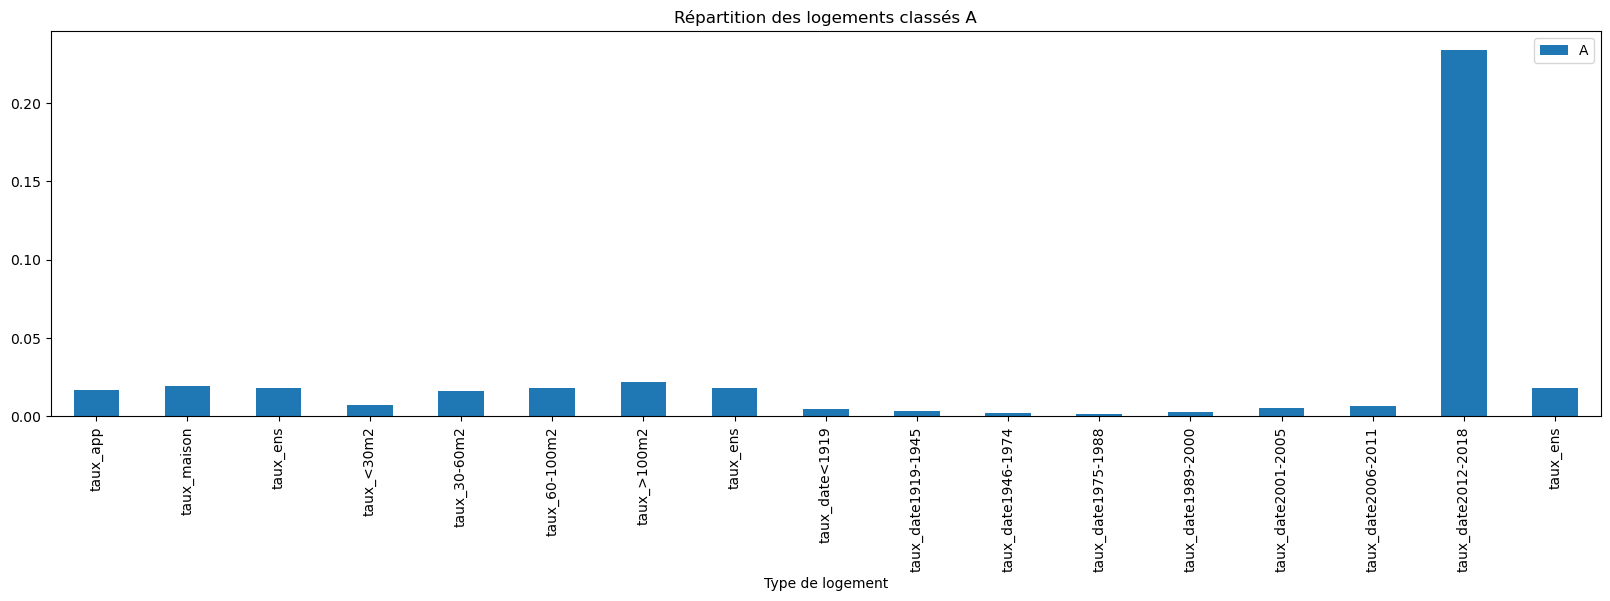

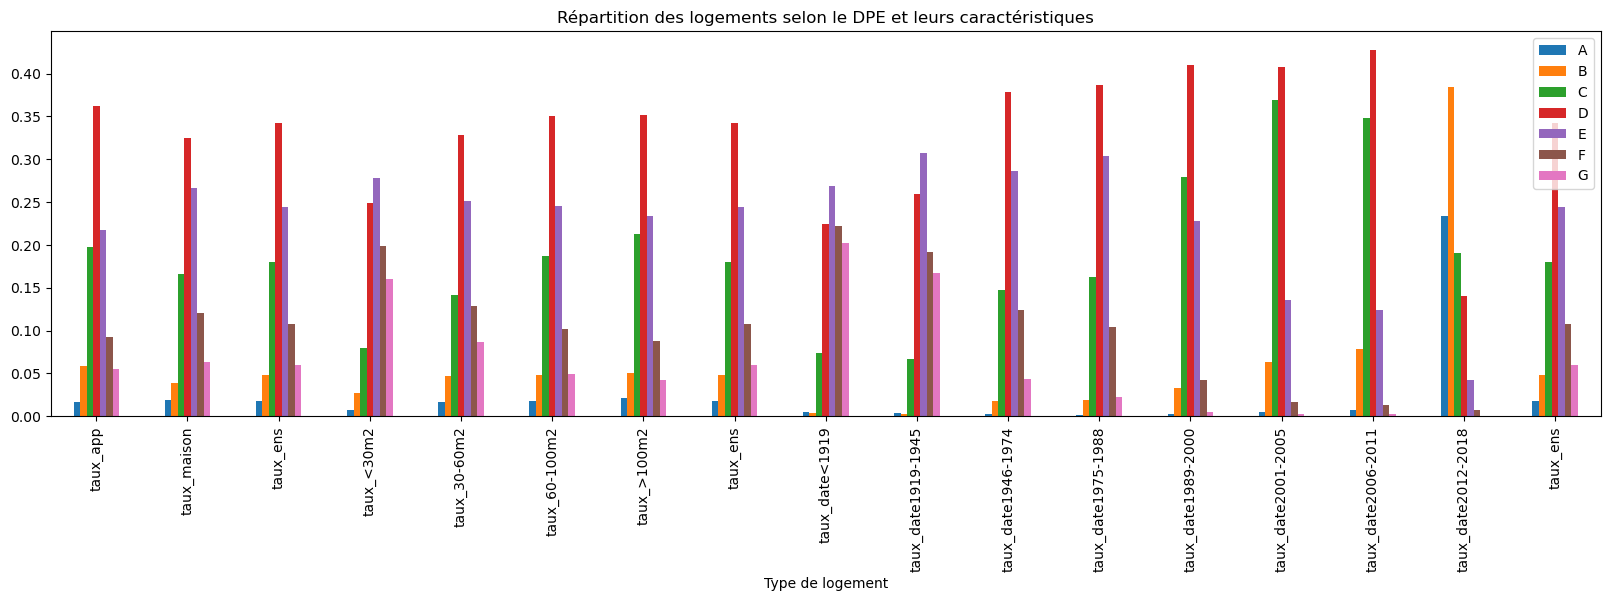

In [138]:
#représentation graphique des caractéristiques des logements selon leur DPE
df_to_plot_log1 = pd.DataFrame(df_log_nat_work,columns=['Type de logement','A','B','C','D','E','F','G'])
#df_to_plot_log1T = pd.DataFrame(df_log_nat_work_T,columns=['taux_app','taux_maison','taux_ens'])
df_to_plot_log1.plot(x ='Type de logement', y=['A'],kind = 'bar', figsize=(20,5), title="Répartition des logements classés A")
df_to_plot_log1.plot(x ='Type de logement', y=['A','B','C','D','E','F','G'],kind = 'bar', figsize=(20,5), title="Répartition des logements selon le DPE et leurs caractéristiques")

La lisibilité n'est pas très bonne, essayons de comparer les DPE selon que l'habitat soit une maison ou un appartement

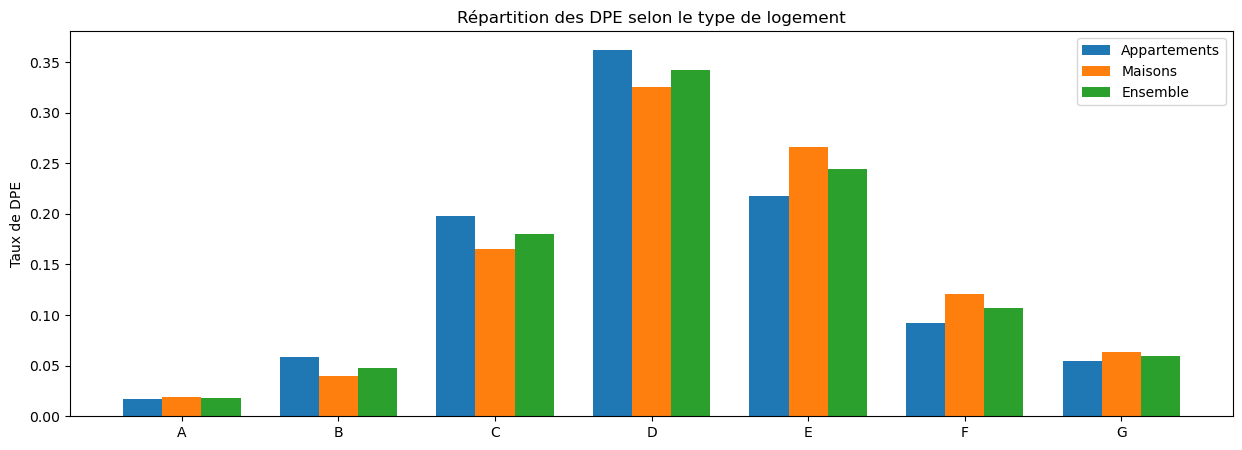

In [139]:
abscisse=['A','B','C','D','E','F','G']

#ci-dessous on traite les appartements, on passe par des listes pour pouvoir afficher tous les graphes sur une même ligne
dpe_app=df_log_nat_work.loc[[2]].values.tolist()
dpe_app=dpe_app[0]
dpe_app.remove('taux_app')
dpe_app.pop()

#ci-dessous on traite les maisons
dpe_maison=df_log_nat_work.loc[[5]].values.tolist()
dpe_maison=dpe_maison[0]
dpe_maison.remove('taux_maison')
dpe_maison.pop()

#ci-dessous l'ensemble
dpe_ens=df_log_nat_work.loc[[7]].values.tolist()
dpe_ens=dpe_ens[0]
dpe_ens.remove('taux_ens')
dpe_ens.pop()

x = np.arange(len(abscisse))  # localisation des labels
width = 0.25  # taille des barres

fig, ax = plt.subplots()
appart = ax.bar(x - width, dpe_app, width, label='Appartements')
maison = ax.bar(x, dpe_maison, width, label='Maisons')
ensemble = ax.bar(x + width, dpe_ens, width, label='Ensemble')

ax.set_ylabel('Taux de DPE')
ax.set_title('Répartition des DPE selon le type de logement')
ax.set_xticks(x,abscisse)
ax.legend()
fig.set_size_inches(15, 5)

plt.show()

### Interprétation : des maisons plus énergivores

Un premier constat à effectuer est la répartition quasi normale des données de DPE, avec une queue de distribution plus importante pour les plus mauvais DPE (il y a relativement plus de F / G que de A / B)

Le second point d'intérêt est la meilleure isolation des appartements par rapport aux maisons (DPE des appartements plus performants en moyenne que ceux des maisons). Il est important de noter que pour chaque DPE, le DPE moyen (catégorie "ensemble") semble être issu d'une pondération quasi équivalente entre maisons et appartements 
# QUESTION : c'est pondéré sur les effectifs ?. 
La conséquence de cela est que les efforts de rénovation énergétiques ne doivent pas être polarisés sur les maisons ou les appartements mais bien sur les deux types de logement.

In [140]:
df_log_nat_work

,Type de logement,A,B,C,D,E,F,G,Total général
2,taux_app,0.016958,0.05812,0.197801,0.36233,0.217816,0.091923,0.055052,1
5,taux_maison,0.019167,0.039333,0.165739,0.325233,0.266467,0.120467,0.063594,1
7,taux_ens,0.018162,0.047883,0.18033,0.342115,0.244327,0.107477,0.059706,1
12,taux_<30m2,0.00736,0.027653,0.079269,0.248638,0.278067,0.198956,0.160057,1
15,taux_30-60m2,0.016078,0.04675,0.141228,0.328343,0.251525,0.129165,0.08691,1
18,taux_60-100m2,0.017969,0.048507,0.186974,0.350237,0.244847,0.102062,0.049405,1
21,taux_>100m2,0.021579,0.050554,0.21246,0.351874,0.233284,0.087534,0.042717,1
23,taux_ens,0.018162,0.047883,0.18033,0.342115,0.244327,0.107477,0.059706,1
28,taux_date<1919,0.004565,0.004006,0.073835,0.224582,0.269042,0.221745,0.202225,1
31,taux_date1919-1945,0.003448,0.003039,0.067223,0.259646,0.307713,0.191665,0.167266,1


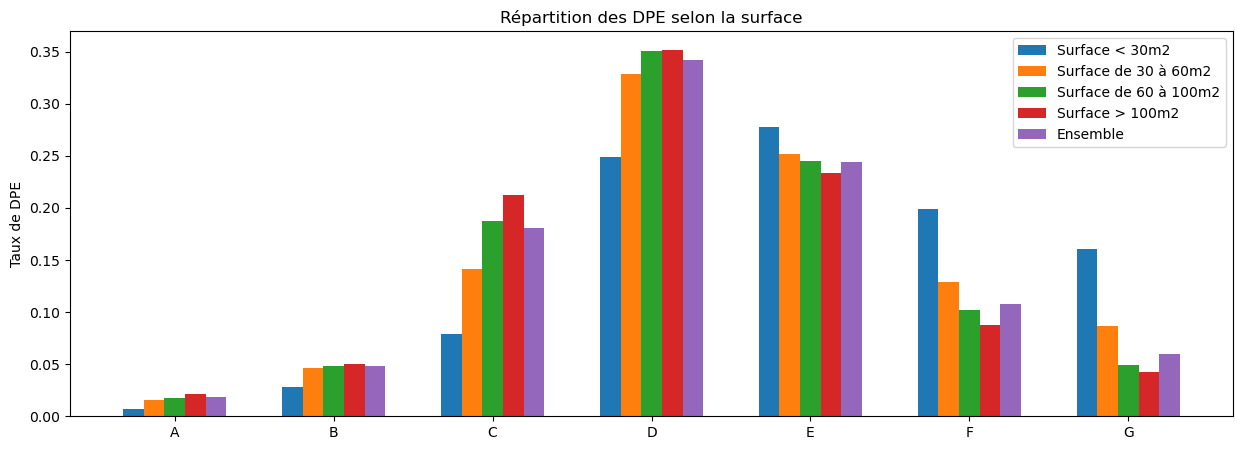

In [141]:
abscisse=['A','B','C','D','E','F','G']

#ci-dessous on va traiter par taille


#<30m2
dpe_inf30=df_log_nat_work.loc[[12]].values.tolist()
dpe_inf30=dpe_inf30[0]
dpe_inf30.remove('taux_<30m2')
dpe_inf30.pop()

#30-60m2
dpe_30a60m2=df_log_nat_work.loc[[15]].values.tolist()
dpe_30a60m2=dpe_30a60m2[0]
dpe_30a60m2.remove('taux_30-60m2')
dpe_30a60m2.pop()

#60-100m2
dpe_60a100m2=df_log_nat_work.loc[[18]].values.tolist()
dpe_60a100m2=dpe_60a100m2[0]
dpe_60a100m2.remove('taux_60-100m2')
dpe_60a100m2.pop()

#>100m2
dpe_sup100m2=df_log_nat_work.loc[[21]].values.tolist()
dpe_sup100m2=dpe_sup100m2[0]
dpe_sup100m2.remove('taux_>100m2')
dpe_sup100m2.pop()

#ci-dessous l'ensemble
dpe_ens=liste=df_log_nat_work.loc[[7]].values.tolist()
dpe_ens=dpe_ens[0]
dpe_ens.remove('taux_ens')
dpe_ens.pop()

x = np.arange(len(abscisse))  # localisation des labels
width = 0.13  # taille des barres

fig, ax = plt.subplots()
dpe_inf30= ax.bar(x - 2*width, dpe_inf30, width, label='Surface < 30m2')
dpe_30a60 = ax.bar(x -width, dpe_30a60m2, width, label='Surface de 30 à 60m2')
dpe_60a100= ax.bar(x, dpe_60a100m2, width, label='Surface de 60 à 100m2')
dpe_sup100 = ax.bar(x +width, dpe_sup100m2, width, label='Surface > 100m2')
ensemble = ax.bar(x + 2*width, dpe_ens, width, label='Ensemble')

ax.set_ylabel('Taux de DPE')
ax.set_title('Répartition des DPE selon la surface')
ax.set_xticks(x,abscisse)
ax.legend()
fig.set_size_inches(15, 5)

plt.show()

### Interprétation : les plus grandes surfaces ont en moyenne un meilleur DPE !

Le lien entre DPE et surface du logement semble suivre empiriquement une règle un peu contre-intuitive. On observe en effet que la distribution des DPE par surface du logement est meilleure (i.e., étiquettes DPE plus proche de la gauche)
# je ne sais pas si je garderais la paranthèse ? ou alors je dirais plus clairement A/B/C par exemple ? (j'ai peut êtr epas compris le sens de la paranthèse 
lorsque les logements sont plus grands. 

On pourrait effectivement penser que plus les logements sont grands, plus ils sont énergivores et difficiles à isoler. Cependant, il est aussi probable que le pouvoir d'achat des détenteurs de plus grands logements soit plus important. Ce dernier leur permet donc d'investir davantage dans des travaux de rénovation énergétique ou de choisir un mode de chauffage plus économe en énergie lorsqu'ils possèdent une maison (pompe à chaleur hybride vs. chauffage au fioul). L'étude par la suite des DPE par décile de revenu permettra de confirmer ou non cette hypothèse.

Enfin, il est possible que l'emploi du logement (pour de la location ou comme résidence principale) ait un impact sur les DPE, il n'est pas cependant clair que la distribution des surfaces selon l'emploi du logement diffère et, à ce stade, nous ne pouvons rien dire.
# tu as fais le graphique et c'était pas hyper clair c'est ca ? 

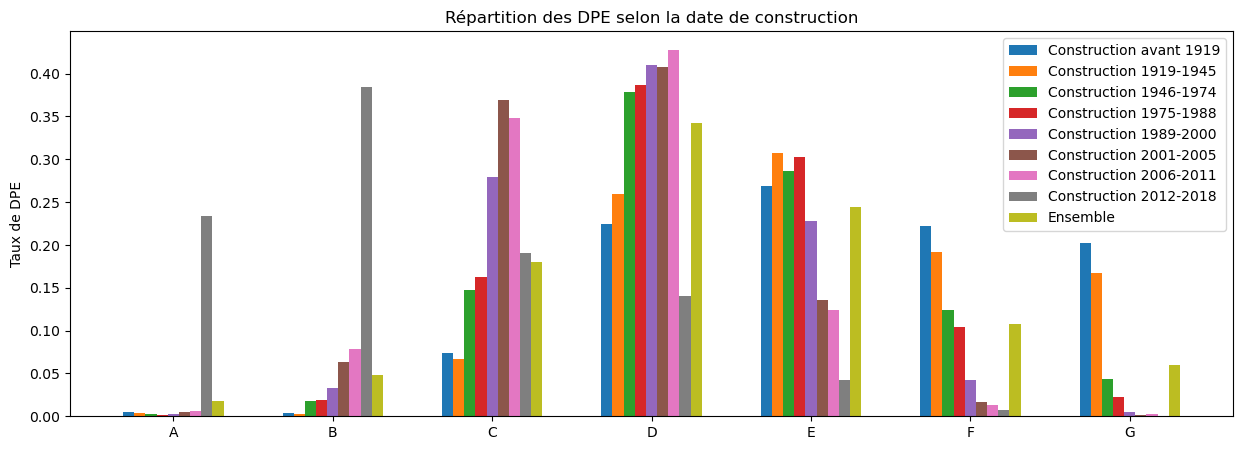

In [168]:
#ci-dessous, on se penche sur la date de construction du logement

abscisse=['A','B','C','D','E','F','G']


#date<1919
dpe_pre1919=df_log_nat_work.loc[[28]].values.tolist()
dpe_pre1919=dpe_pre1919[0]
dpe_pre1919.remove('taux_date<1919')
dpe_pre1919.pop()

#date 1919-1945
dpe_1919to1945=df_log_nat_work.loc[[31]].values.tolist()
dpe_1919to1945=dpe_1919to1945[0]
dpe_1919to1945.remove('taux_date1919-1945')
dpe_1919to1945.pop()

#date 1946-1974
dpe_1946to1974=df_log_nat_work.loc[[34]].values.tolist()
dpe_1946to1974=dpe_1946to1974[0]
dpe_1946to1974.remove('taux_date1946-1974')
dpe_1946to1974.pop()

#date 1975-1988
dpe_1975to1988=df_log_nat_work.loc[[37]].values.tolist()
dpe_1975to1988=dpe_1975to1988[0]
dpe_1975to1988.remove('taux_date1975-1988')
dpe_1975to1988.pop()

#date 1989-2000
dpe_1989to2000=df_log_nat_work.loc[[40]].values.tolist()
dpe_1989to2000=dpe_1989to2000[0]
dpe_1989to2000.remove('taux_date1989-2000')
dpe_1989to2000.pop()

#date 2001-2005
dpe_2001to2005=df_log_nat_work.loc[[43]].values.tolist()
dpe_2001to2005=dpe_2001to2005[0]
dpe_2001to2005.remove('taux_date2001-2005')
dpe_2001to2005.pop()

#date 2006-2011
dpe_2006to2011=df_log_nat_work.loc[[46]].values.tolist()
dpe_2006to2011=dpe_2006to2011[0]
dpe_2006to2011.remove('taux_date2006-2011')
dpe_2006to2011.pop()

#date 2012-2018
dpe_2012to2018=df_log_nat_work.loc[[49]].values.tolist()
dpe_2012to2018=dpe_2012to2018[0]
dpe_2012to2018.remove('taux_date2012-2018')
dpe_2012to2018.pop()

#ci-dessous l'ensemble
dpe_ens=liste=df_log_nat_work.loc[[7]].values.tolist()
dpe_ens=dpe_ens[0]
dpe_ens.remove('taux_ens')
dpe_ens.pop()

x = np.arange(len(abscisse))  # localisation des labels
width = 0.07  # taille des barres

fig, ax = plt.subplots()
dpe_pre1919= ax.bar(x - 4*width, dpe_pre1919, width, label='Construction avant 1919')
dpe_1919to1945= ax.bar(x - 3*width, dpe_1919to1945, width, label='Construction 1919-1945')
dpe_1946to1974= ax.bar(x - 2*width, dpe_1946to1974, width, label='Construction 1946-1974')
dpe_1975to1988= ax.bar(x - width, dpe_1975to1988, width, label='Construction 1975-1988')
dpe_1989to2000= ax.bar(x , dpe_1989to2000, width, label='Construction 1989-2000')
dpe_2001to2005= ax.bar(x +width, dpe_2001to2005, width, label='Construction 2001-2005')
dpe_2006to2011= ax.bar(x + 2*width, dpe_2006to2011, width, label='Construction 2006-2011')
dpe_2012to2018= ax.bar(x + 3*width, dpe_2012to2018, width, label='Construction 2012-2018')
ensemble = ax.bar(x + 4*width, dpe_ens, width, label='Ensemble')

ax.set_ylabel('Taux de DPE')
ax.set_title('Répartition des DPE selon la date de construction')
ax.set_xticks(x,abscisse)
ax.legend()
fig.set_size_inches(15, 5)

plt.show()

### Interprétation : les logements les plus récents ont un meilleur DPE !

Le lien entre DPE et date de construction semble plutôt logique : les logements les plus récents sont répartis davantages parmi les meilleurs DPE. On observe par exemple que pour les DPE F, la part de DPE F décroit strictement avec l'année de construction (~20% des logements construits avant 1919 et 1-2% des logements construits depuis 2012).

On observe par ailleurs une très impressionnante accélération des efforts d'isolation et de sobriété des logements avec ceux qui ont été construits de 2012 à 2018. Les étiquettes de DPE A et B représentent respectivement 23% et 38% des constructions durant cette période (moyenne de 2% pour les DPE A et 5% pour les DPE B).

### 2.1.2. Etudions les passoires thermiques DPE F ou G

Commençons par calculer le pourcentage de passoires thermiques dans chaque département

In [143]:
# Derive New Column from Existing Column

df_bdd_nat_work=df_bdd_nat_work.assign(Taux_Passoires_Thermique=(df_bdd_nat_work['Taux_F']+df_bdd_nat_work['Taux_G'])*100)

In [144]:
df_bdd_nat_work.head(20)

,Département,Département_nom,A,B,C,D,E,F,G,Taux_A,...,Taux_C,Taux_D,Taux_E,Taux_F,Taux_G,DPE_Moyen,Log_totaux,log_tot_quint,DPE_Mode,Taux_Passoires_Thermique
0,1,Ain,4045.481744,14947.859970,50399.284564,79358.198695,62637.786293,27244.081590,19850.939052,0.015651,...,0.194981,0.307014,0.242328,0.105400,0.076798,4.325929,258483.631907,5,D,18.219730
1,2,Aisne,1358.182738,5343.744918,16897.259675,57252.828276,69185.693031,38252.237532,22656.068623,0.006439,...,0.080102,0.271410,0.327978,0.181337,0.107402,4.862776,210946.014793,4,E,28.873883
2,3,Allier,1076.998237,2857.571424,21098.919567,47519.600985,45894.658951,23572.887522,17493.556769,0.006752,...,0.132270,0.297902,0.287715,0.147779,0.109668,4.723923,159514.193454,3,D,25.744696
3,4,Alpes-de-Haute-Provence,1922.048688,1638.787242,6722.580319,21872.642872,20019.934094,11401.938099,10092.664127,0.026090,...,0.091252,0.296898,0.271749,0.154769,0.136997,4.778268,73670.595441,0,D,29.176637
4,5,Hautes-Alpes,528.860923,1314.368792,6833.226703,14893.719781,17720.801906,8803.285594,8689.476209,0.008997,...,0.116243,0.253365,0.301458,0.149757,0.147821,4.856483,58783.739909,0,E,29.757824
5,6,Alpes-Maritimes,11815.026075,32741.704372,168053.460347,212556.098431,87111.472985,31651.723590,10705.936616,0.021302,...,0.302998,0.383236,0.157061,0.057068,0.019303,3.844133,554635.422416,8,D,7.637028
6,7,Ardèche,3450.067924,4613.980259,20072.427238,35529.974523,36784.778591,18058.046289,17657.344298,0.025337,...,0.147411,0.260930,0.270145,0.132617,0.129675,4.633212,136166.619123,2,E,26.229182
7,8,Ardennes,357.615108,3440.964517,13073.048430,36849.557201,37741.272738,17002.884673,10990.062443,0.002994,...,0.109439,0.308480,0.315944,0.142337,0.092001,4.700591,119455.405111,2,E,23.433805
8,9,Ariège,729.642493,1878.391779,11710.841827,18670.598620,16823.926953,8738.068679,5995.503357,0.011304,...,0.181431,0.289256,0.260646,0.135375,0.092886,4.536509,64546.973707,0,D,22.826124
9,10,Aube,598.450763,4300.754525,20864.624123,40957.694112,37944.387099,18652.026934,11393.319615,0.004442,...,0.154884,0.304041,0.281672,0.138459,0.084576,4.580255,134711.257171,2,D,22.303516


# IDEE AFFICHER LE TOP 10 DES DEP
Faisons un classement des meilleurs élèves

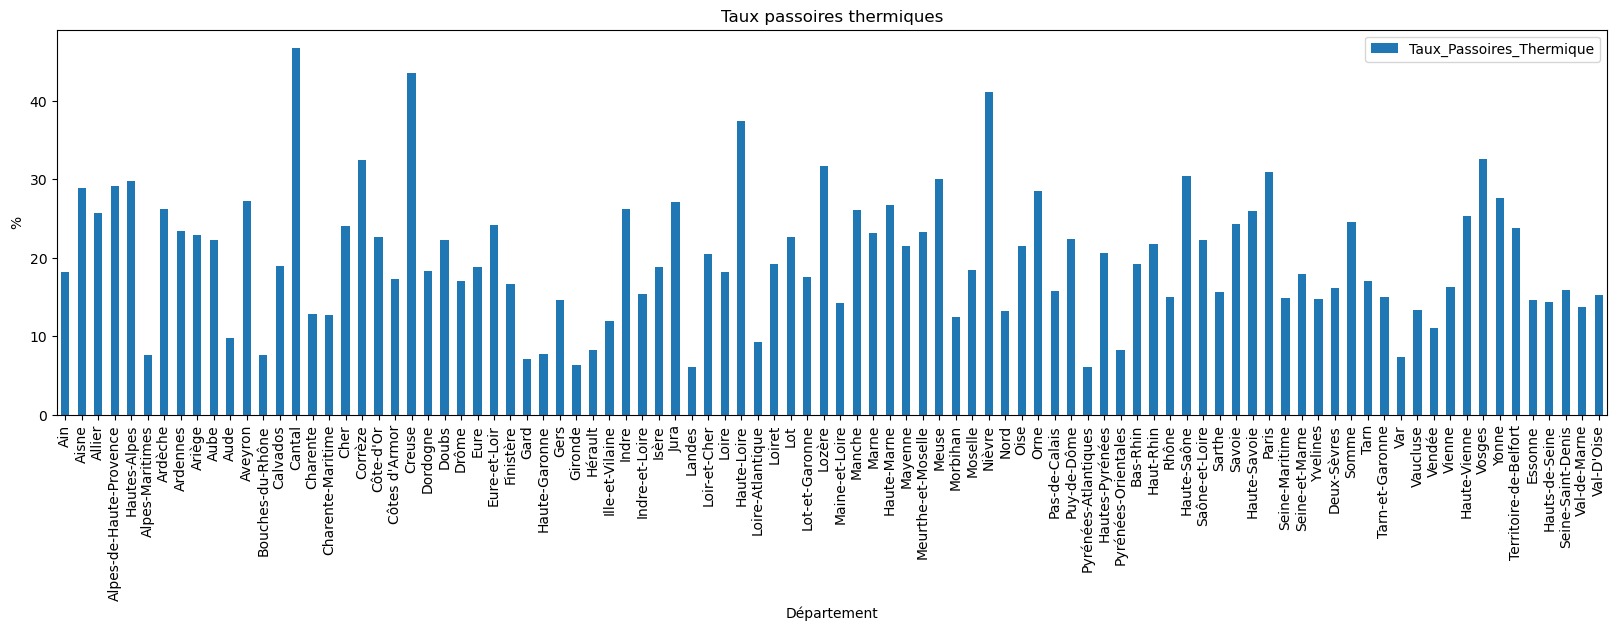

In [145]:
df_to_plot_2 = pd.DataFrame(df_bdd_nat_work,columns=['Département_nom','Taux_Passoires_Thermique'])
df_to_plot_2.plot(x ='Département_nom', y='Taux_Passoires_Thermique', kind = 'bar', figsize=(20,5), title="Taux passoires thermiques")
plt.xlabel('Département')
plt.ylabel('%')
plt.show()

## 2.2. Un peu de visualisation spatiale

On commence par importer ce qu'il nous faut

In [165]:
from cartiflette.download import get_vectorfile_ign

In [166]:
france = get_vectorfile_ign(
  level = "COMMUNE",
  field = "metropole",
  source = "COG",
  provider="opendatarchives"
  )

TypeError: '>' not supported between instances of 'str' and 'int'

Ici on va commencer à regrouper comme il nous faut les départements pour la visualisation spatiale

In [148]:
france['surface'] = france.area.div(10**6)

NameError: name 'france' is not defined

In [156]:
france_copy=france.dissolve(by='INSEE_DEP', aggfunc='sum')

NameError: name 'france' is not defined

In [157]:
france_copy.head(30) #on voit que la Corse est présente en bas du tableau, on va devoir l'enlever

NameError: name 'france_copy' is not defined

In [74]:
#à ne compiler qu'une fois

france_copy.drop('2A',axis=0,inplace=True)
france_copy.drop('2B',axis=0,inplace=True)

# on a rendu son indépendance à la corse

In [78]:
DPE_liste=df_bdd_nat_work['DPE_Moyen'].tolist() 
DPE_mode=df_bdd_nat_work['DPE_Mode'].tolist() 
quintile_log=df_bdd_nat_work['log_tot_quint'].tolist()
france_DPE = france_copy.assign(DPE=DPE_liste)
france_DPE = france_DPE.assign(DPE_mode=DPE_mode)
france_DPE = france_DPE.assign(quintile_logement=quintile_log)
france_DPE

,geometry,POPULATION,surface,DPE
INSEE_DEP,,,,
01,"POLYGON ((843069.400 6536413.800, 843056.900 6...",652432,5774.264919,4.325929
02,"POLYGON ((718664.700 6873887.300, 718653.100 6...",531345,7418.591125,4.862776
03,"POLYGON ((673871.400 6559735.100, 673865.200 6...",335975,7365.660274,4.723923
04,"POLYGON ((922047.200 6296459.200, 922042.000 6...",164308,6994.193101,4.778268
05,"POLYGON ((920018.300 6349446.500, 920013.800 6...",141220,5685.026797,4.856483
...,...,...,...,...
91,"POLYGON ((622877.700 6801316.200, 622850.700 6...",1301659,1818.556444,4.402458
92,"POLYGON ((643324.900 6852986.700, 643317.100 6...",1624357,175.570732,4.367739
93,"POLYGON ((657256.900 6861184.400, 657195.100 6...",1644903,236.867946,4.370616


### 2.2.1. Titre a message  

Nous allons dans un premier temps visualiser la performence energétique des logements à l'échelle départementale. Pour cela nous utilisons plusieurs indicateurs : le "DPE" moyen, la catégorie de DPE la plus fréquente dans le département, 
=> il faudra ajouter les indicateurs que l'on aura trouvé perrtinent dans la partie stat desc (par exemple locataire ou ancieneté ect)

#### Analyse au niveau du DPE une grande variabilité en moyenne et une répartition qui semblent dépendante de la densité

<AxesSubplot: title={'center': 'DPE Moyens sur le territoire, A=1, G=7'}>

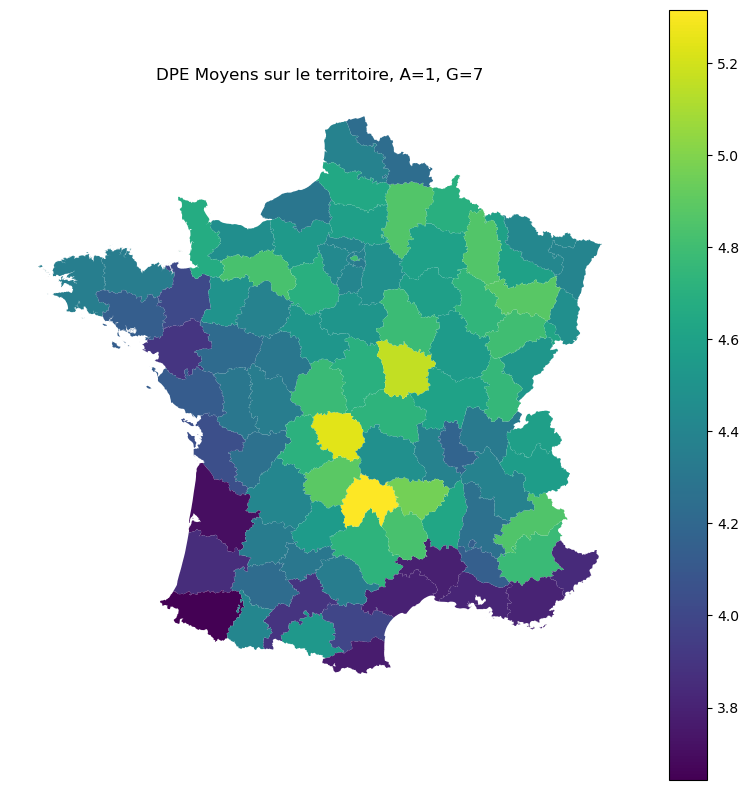

In [79]:
#Carte du score "DPE moyen"
fig,ax = plt.subplots(figsize=(10, 10))
france_DPE.plot(ax = ax, column = "DPE", legend=True)
ax.set_axis_off()
plt.title('DPE Moyens à l\'éhelle départementale, A=1, G=7')
ax

L'analyse spatiale par département permet de visualiser les inégalités terriroriales en termes de performance energétique. En effet, l'étude du "DPE moyen" (voir score construit précédement) permet de mettre en évidence des différences entre départements : la cote méditérannéenne obtient les meilleurs scores, suivit ensuite par la cote atlantique. Le centre de la France, et plus largement la diagonale partant de la Meuse et s'étendant à la limite de la région occitanie, présente les scores de DPE les plus elevés, soit les moins performants. Cette diagonale est souvent qualifié de diagonale "du vide", en raison de sa faible densité de population. La répartition du nombre de logement par département donne à voir cette plus faible densité de logements dans les départements dont le score est le moins performant. 

In [ ]:
#Carte de la répartition des logements par départements 
fig,ax = plt.subplots(figsize=(10, 10))
france_DPE.plot(ax = ax, column = "quintile_logement", legend=True)
ax.set_axis_off()
plt.title('Densité de logements répartie par décile du nombre de logements et par département ')
ax

D'autres indicateurs produits à partir du DPE peuvent être intéressants. Le score au DPE par département ne permet pas de mettre en évidence la note de DPE la plus fréquente. Cette dernière illustre une autre dimension de la performance energétique et de la précarité de certains territoires, que la moyenne pondérée créée à partir de la note de DPE peut masquer. Par exemple, Paris était relativement mal classé à partir du score, alors que que la note la plus fréquente est D comme sur la très grande majorité du territoire. Par ailleurs, cela permet de mettre en évidence que les département de la Creuse et du Cantal, qui présentaient déjà un score très elevés, sont composés d'une majorité relative de logements classés "E". La performance energétique des logements y est donc très faible.

In [ ]:
#carte du DPE le plus fréquent
fig,ax = plt.subplots(figsize=(10, 10))
france_DPE.plot(ax = ax, column = "DPE_mode", legend=True)
ax.set_axis_off()
plt.title('Note obtenue au DPE la plus fréquente par département')
ax

#### Analyse à partir des autres variables

### 2.2.2. Titre a message plus spécifique sur la passoire thermique 

In [87]:
passoires=df_bdd_nat_work['Taux_Passoires_Thermique'].tolist() 
france_passoires = france_copy.assign(passoires=passoires)
france_passoires

,geometry,POPULATION,surface,passoires
INSEE_DEP,,,,
01,"POLYGON ((843069.400 6536413.800, 843056.900 6...",652432,5774.264919,18.219730
02,"POLYGON ((718664.700 6873887.300, 718653.100 6...",531345,7418.591125,28.873883
03,"POLYGON ((673871.400 6559735.100, 673865.200 6...",335975,7365.660274,25.744696
04,"POLYGON ((922047.200 6296459.200, 922042.000 6...",164308,6994.193101,29.176637
05,"POLYGON ((920018.300 6349446.500, 920013.800 6...",141220,5685.026797,29.757824
...,...,...,...,...
91,"POLYGON ((622877.700 6801316.200, 622850.700 6...",1301659,1818.556444,14.624251
92,"POLYGON ((643324.900 6852986.700, 643317.100 6...",1624357,175.570732,14.376621
93,"POLYGON ((657256.900 6861184.400, 657195.100 6...",1644903,236.867946,15.940095


<AxesSubplot: title={'center': 'Taux de passoires thermiques'}>

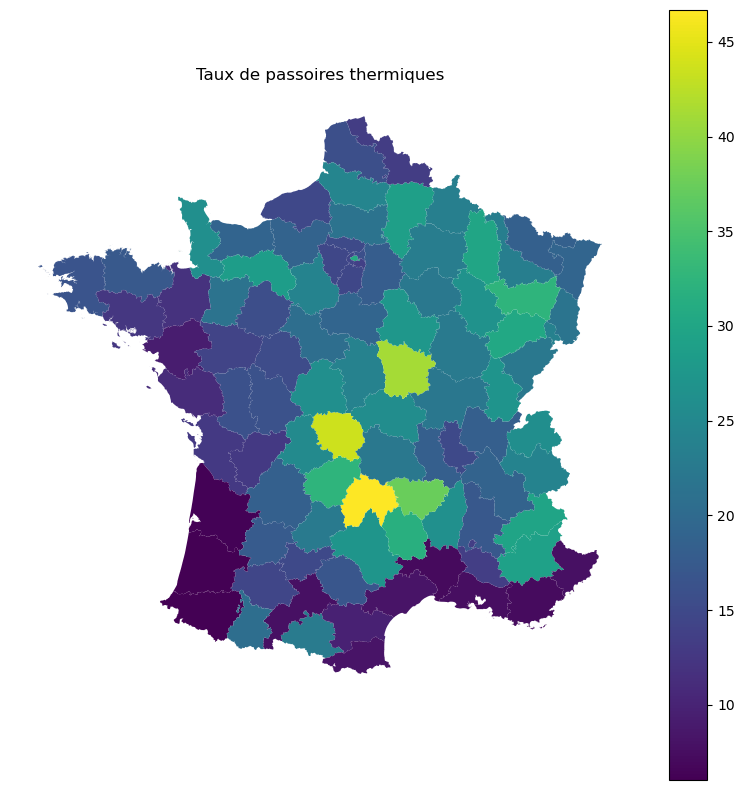

In [88]:
fig,ax = plt.subplots(figsize=(10, 10))
france_passoires.plot(ax = ax, column = "passoires", legend=True)
ax.set_axis_off()
plt.title('Taux de passoires thermiques')
ax

En cohérence avec les analyses précédentes, la proportion de passoire thermique est très faibles dans les départements situés sur les côtes françaises et plus elevés sur la diagonale qui traverse d'est en ouest, en particulier, dans les départements de la Meuse et du Cantal, près d'un logement sur deux peut être qualifiés de passoire thermique.